In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

RUNNING MORE TESTS, TO CHECK COLINIARITY AND IF TO INCLUDE EXTRA PREDICTORS

In [11]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
reg = smf.ols('Sales ~ TV + Radio + Newspaper', data=advertising).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        11:50:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
sm.stats.anova_lm(reg, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
TV,1.0,3314.618167,3314.618167,1166.730757,1.809337e-84
Radio,1.0,1545.616603,1545.616603,544.050126,1.882722e-58
Newspaper,1.0,0.088717,0.088717,0.031228,8.599151e-01
Residual,196.0,556.825263,2.840945,NaN,NaN


In [5]:
sm.stats.anova_lm(reg, typ=2)

,sum_sq,df,F,PR(>F)
TV,3058.010016,1.0,1076.405837,1.509960e-81
Radio,1361.736549,1.0,479.325170,1.505339e-54
Newspaper,0.088717,1.0,0.031228,8.599151e-01
Residual,556.825263,196.0,NaN,NaN


In [10]:
reg = smf.ols('Sales ~ Radio + Newspaper', data=advertising).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     49.11
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           4.96e-18
Time:                        11:50:51   Log-Likelihood:                -573.24
No. Observations:                 200   AIC:                             1152.
Df Residuals:                     197   BIC:                             1162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1889      0.628     14.640      0.000       7.951      10.427
Radio          0.1990      0.022      9.101      0.000       0.156       0.242
Newspaper      0.0066      0.015      0.446      0.656      -0.023       0.036
==============================================================================
Omnibus:                       19.261   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.768
Skew:                          -0.765   Prob(JB):                     1.88e-05
Kurtosis:                       3.519   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
reg = smf.ols('Sales ~ Radio + TV', data=advertising).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           4.83e-98
Time:                        11:52:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
TV             0.0458      0.001     32.909      0.000       0.043       0.048
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BASIC PLOTS

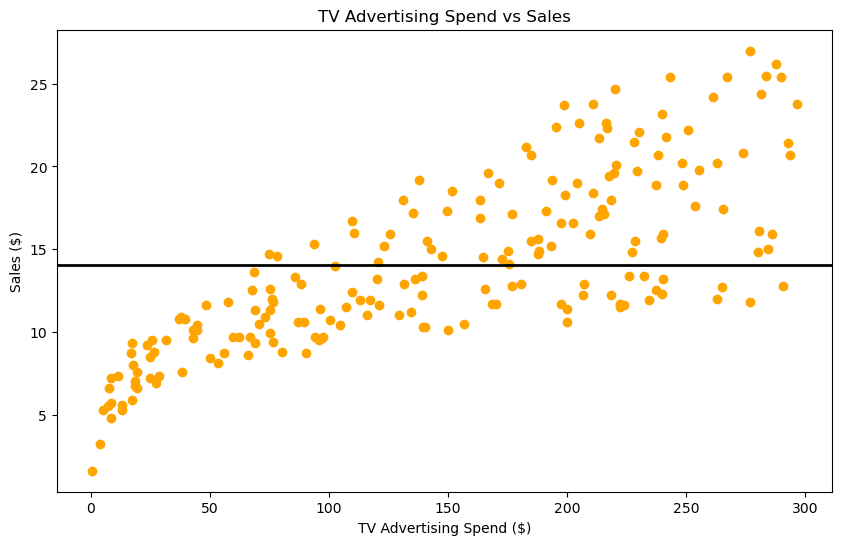

In [17]:

mean_sales = advertising['Sales'].mean()

# Scatter plot with TV as X and Sales as Y
plt.figure(figsize=(10,6))
plt.scatter(advertising['TV'], advertising['Sales'], color='orange')
plt.title("TV Advertising Spend vs Sales")
plt.xlabel("TV Advertising Spend ($)")
plt.ylabel("Sales ($)")
plt.axhline(y=mean_sales, color='black', linestyle='-', linewidth=2, label=f'Mean Sales = {mean_sales:.2f}')

# Show plot
plt.show()

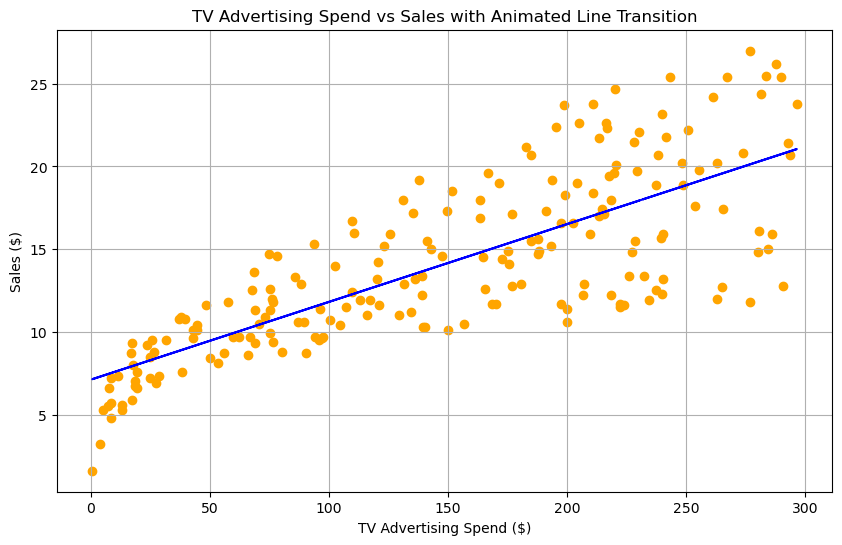

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Assuming you already have the 'advertising' DataFrame

# Calculate the mean of Sales
mean_sales = advertising['Sales'].mean()

# Linear regression line (y = mx + b)
# Calculate slope (m) and intercept (b)
m, b = np.polyfit(advertising['TV'], advertising['Sales'], 1)

# Setup figure and scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(advertising['TV'], advertising['Sales'], color='orange')
ax.set_title("TV Advertising Spend vs Sales with Animated Line Transition")
ax.set_xlabel("TV Advertising Spend ($)")
ax.set_ylabel("Sales ($)")
ax.grid(True)

# Initialize the line with the mean
line, = ax.plot(advertising['TV'], [mean_sales]*len(advertising['TV']), color='blue')

# Define animation function
def animate(i):
    slope = (m / 100) * i  # Incrementally increase the slope
    intercept = mean_sales + (b - mean_sales) * (i / 100)  # Adjust the intercept gradually
    line.set_ydata(slope * advertising['TV'] + intercept)  # Update the line data
    return line,

# Animate over 100 frames
ani = FuncAnimation(fig, animate, frames=100, interval=50)

# Save animation as a GIF or MP4 file
ani.save("linear_regression_animation.gif", writer=PillowWriter(fps=20))

# Show plot
plt.show()


Qudratic regression graph